Importing the dependencies

In [1]:
# Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection and analysis

In [2]:
insurance_dataset = pd.read_csv('insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.shape

(1338, 7)

In [5]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Getting some information of the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features : Sex, Smoker, Region

In [8]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [9]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [10]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [11]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_18572\202952548.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


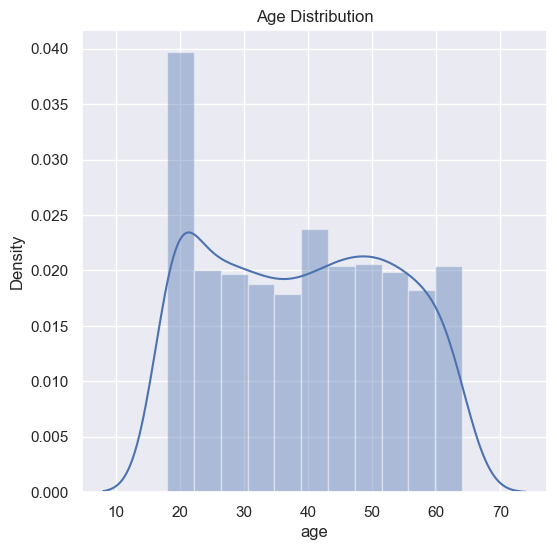

In [12]:
# Distribution of age values
sns.set()
plt.figure(figsize = (6, 6))
sns.distplot(insurance_dataset['age'])
plt.title("Age Distribution")
plt.show()

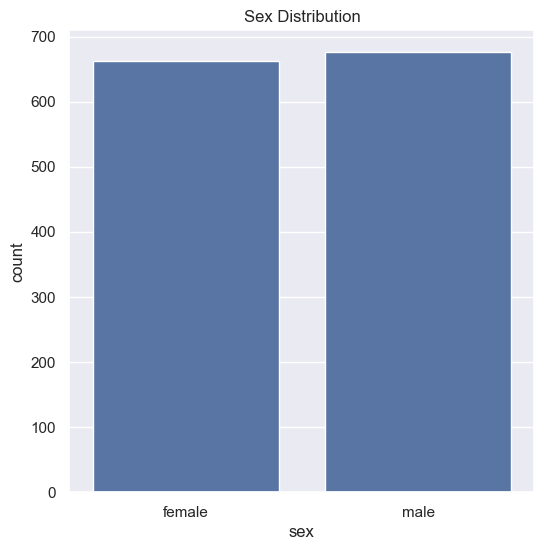

In [13]:
# Gender column
plt.figure(figsize= (6, 6))
sns.countplot(x= 'sex', data= insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [14]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_18572\3223049903.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


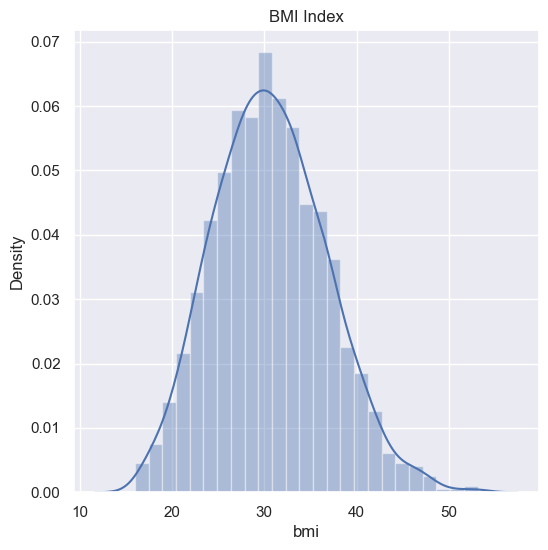

In [15]:
plt.figure(figsize = (6, 6))
sns.distplot(insurance_dataset['bmi'])
plt.title("BMI Index")
plt.show()

Normal BMI range --> 18.5 to 24.9

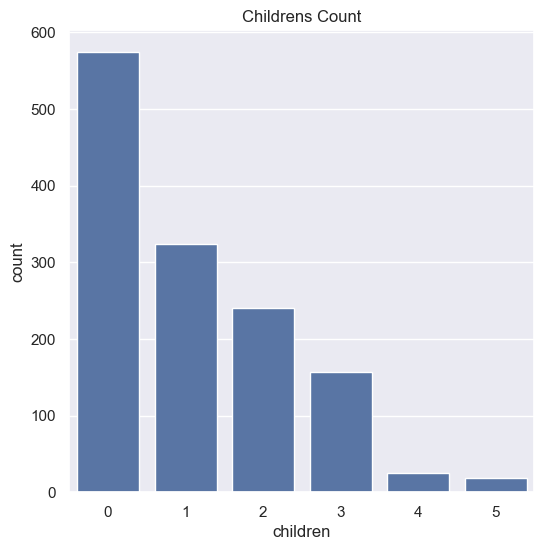

In [16]:
plt.figure(figsize=(6, 6))
sns.countplot(x= 'children', data= insurance_dataset)
plt.title("Childrens Count")
plt.show()

In [17]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

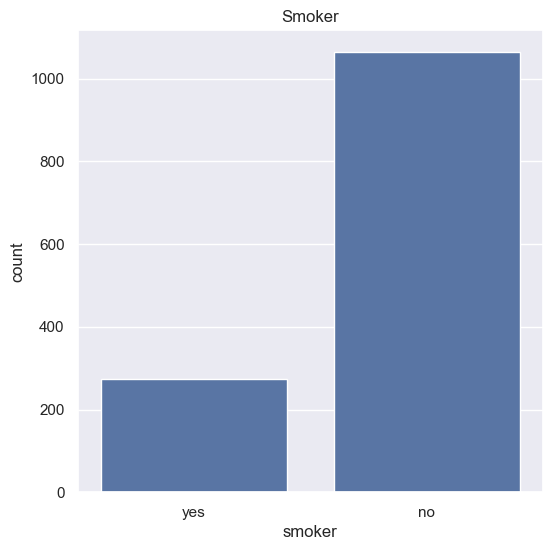

In [18]:
plt.figure(figsize=(6, 6))
sns.countplot(x= 'smoker', data= insurance_dataset)
plt.title("Smoker")
plt.show()

In [19]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

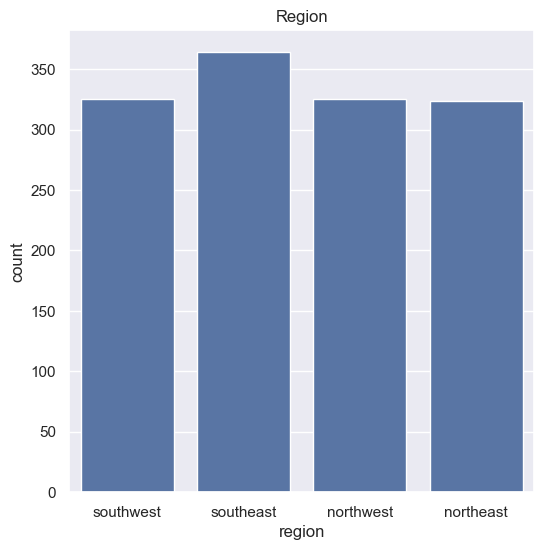

In [20]:
plt.figure(figsize=(6, 6))
sns.countplot(x= 'region', data= insurance_dataset)
plt.title("Region")
plt.show()

In [21]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_18572\3760306163.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


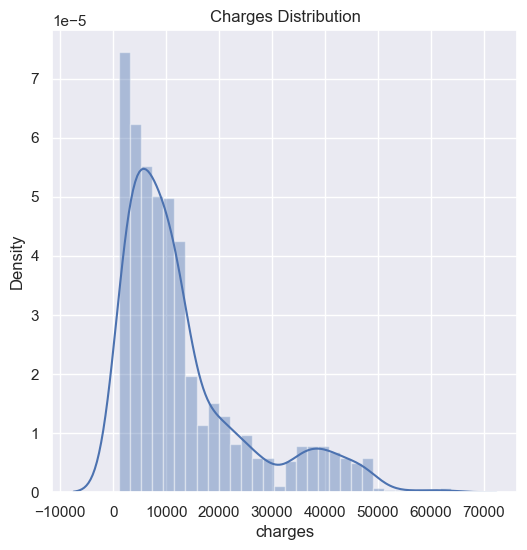

In [22]:
plt.figure(figsize = (6, 6))
sns.distplot(insurance_dataset['charges'])
plt.title("Charges Distribution")
plt.show()

**Data PreProcessing**

**Encoding the categorical feature**

**sex** : female -> 1, male -> 0

**smoker** : yes -> 0, no -> 1

**region** southeast    0,
southwest    1,
northwest    2,
northeast    3

In [23]:
insurance_dataset.replace({'sex' : {'female' : 0, 'male' : 1}, 'smoker' : {'yes' : 0, 'no' : 1}, 'region' : {'southeast' : 0, 'southwest' : 1, 'northwest' : 3, 'northeast': 2}}, inplace= True)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_18572\3369832398.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex' : {'female' : 0, 'male' : 1}, 'smoker' : {'yes' : 0, 'no' : 1}, 'region' : {'southeast' : 0, 'southwest' : 1, 'northwest' : 3, 'northeast': 2}}, inplace= True)


In [24]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,0,1725.55230
2,28,1,33.000,3,1,0,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520


Dividing into Label and feature

In [25]:
X = insurance_dataset.drop(columns= 'charges', axis= 1)
Y = insurance_dataset['charges']

Train test split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [28]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1338,) (1070,) (268,)


Linear Regression

In [37]:
regressor = LinearRegression()

In [38]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [48]:
# Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [49]:
# R SQUARED ERROR ON TRAINING DATA
r_train = metrics.r2_score(Y_train, training_data_prediction) 

In [50]:
print("R SQUARED VALUE:",r_train)

R SQUARED VALUE: 0.751505643411174


In [51]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [52]:
r_test = metrics.r2_score(Y_test, test_data_prediction)

In [53]:
print("R SQUARED VALUE:",r_test)

R SQUARED VALUE: 0.7447273869684077


Predictive System

In [ ]:
input_data = (19,0,27.900,0,0,1)

input_data_as_np_array = np.asarray(input_data)

reshaped_input_data = input_data_as_np_array.reshape(1, -1)

prediction = regressor.predict(reshaped_input_data)
print(prediction)

[25597.73941347]


c:\Users\Mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
